# تمرین ۳ .اعمال فیلتر در دامنه فرکانس
## بخش پ

### Import Liberaries

In [1]:
from random import randint
import numpy as np
from matplotlib import pyplot as plt

### Create Main Image and 10x10 Mask

In [2]:
img = np.zeros((100, 100))
mask = np.ones((10, 10))

### Set the Mask at the Center of Image

In [3]:
base_index = 50 - int(mask.shape[0] / 2)
img[base_index:base_index + mask.shape[0], base_index:base_index + mask.shape[0]] = mask

### Calculate Shifted fft2 of the Image

In [4]:
img_freq = np.fft.fft2(img)
img_freq = np.fft.fftshift(img_freq)

### Show the Results

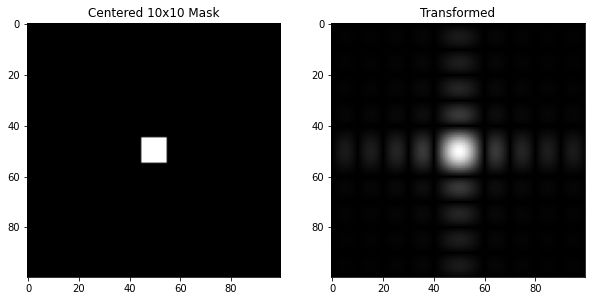

In [5]:
_, subplt = plt.subplots(1, 2, figsize=(10, 5))
subplt[0].imshow(img, cmap='gray')
subplt[0].title.set_text("Centered 10x10 Mask")
subplt[1].imshow(np.absolute(img_freq), cmap='gray')
subplt[1].title.set_text('Transformed')
plt.show()

### Move the Mask and Show the Results

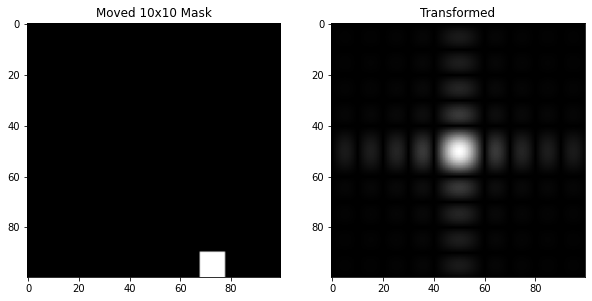

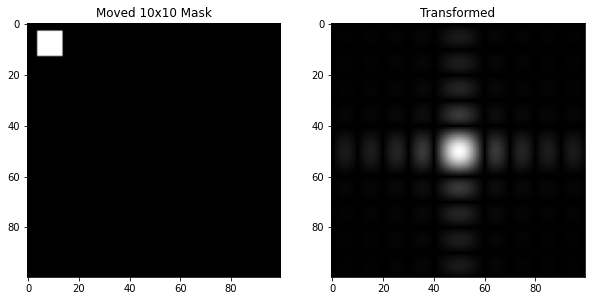

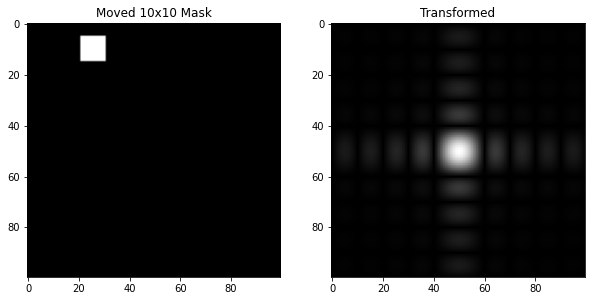

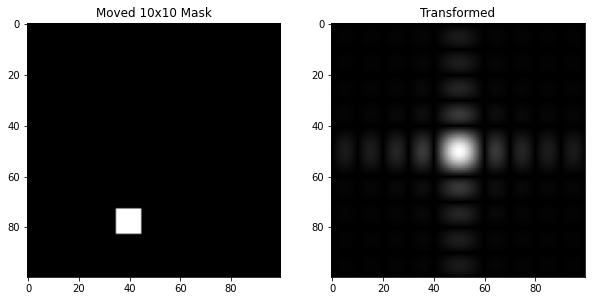

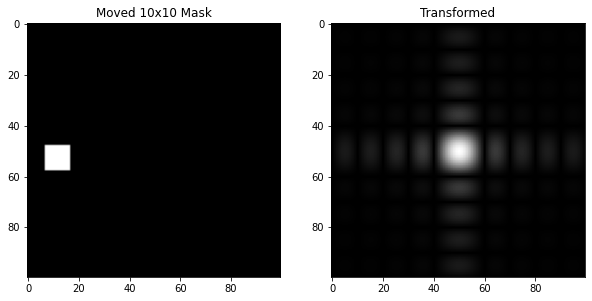

In [6]:
for _ in range(5):
    x = randint(0, 90)
    x -= 45
    y = randint(0, 90)
    y -= 45
    img = np.zeros((100, 100))
    mask = np.ones((10, 10))
    base_index = 50 - int(mask.shape[0] / 2)
    img[base_index + y:base_index + mask.shape[0] + y, base_index + x:base_index + mask.shape[0] + x] = mask
    img_freq = np.fft.fft2(img)
    img_freq = np.fft.fftshift(img_freq)
    _, subplt = plt.subplots(1, 2, figsize=(10, 5))
    subplt[0].imshow(img, cmap='gray')
    subplt[0].title.set_text("Moved 10x10 Mask")
    subplt[1].imshow(np.absolute(img_freq), cmap='gray')
    subplt[1].title.set_text('Transformed')
    plt.show()

### مشاهده:
با جابجایی مربع سفید در تصویر، تغییری در مد فرکانس به چشم نمی خورد و احتمالا جابجایی در ضریب تصاویر پایه تاثیری ندارد

### نتیجه گیری:
با جابجا کردن مربع تنها روی فاز ضرایب تصاویر پایه اثر گذاشته می شود به همین دلیل خروجی نهایی تصویر که اندازه ضرایب هستند همگی یکسان به نظر می رسند

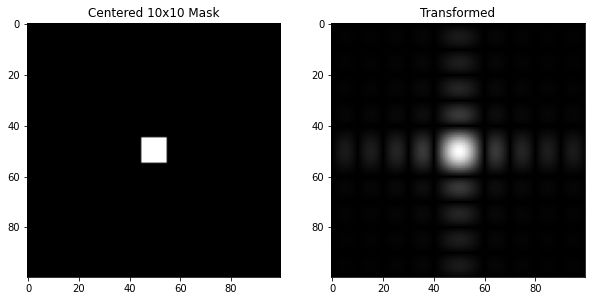

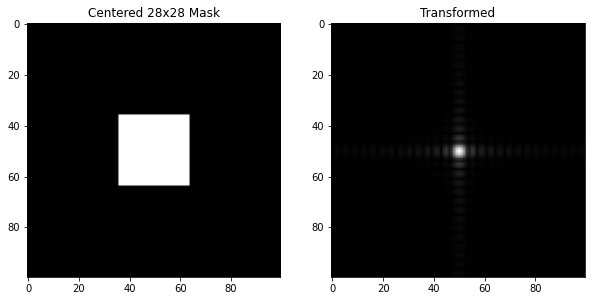

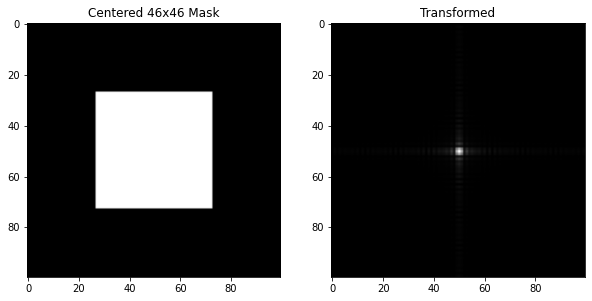

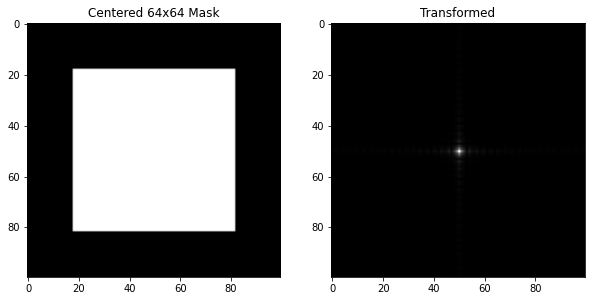

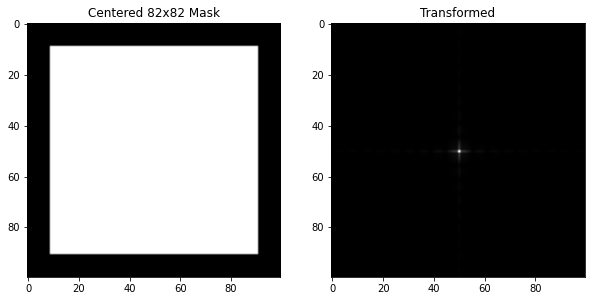

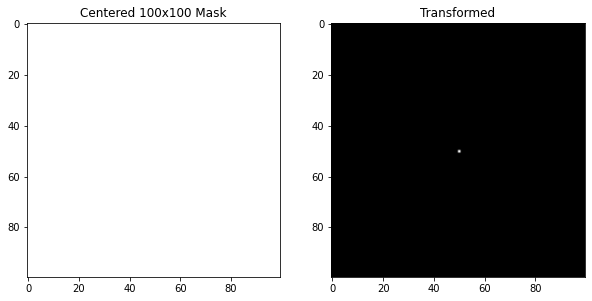

In [7]:
img = np.zeros((100, 100))
for i in range(10, 101, 18):
    mask = np.ones((i, i))
    base_index = 50 - int(mask.shape[0] / 2)
    img[base_index:base_index + mask.shape[0], base_index:base_index + mask.shape[0]] = mask
    img_freq = np.fft.fft2(img)
    img_freq = np.fft.fftshift(img_freq)
    _, subplt = plt.subplots(1, 2, figsize=(10, 5))
    subplt[0].imshow(img, vmin=0, vmax=1, cmap='gray')
    subplt[0].title.set_text(f"Centered {i}x{i} Mask")
    subplt[1].imshow(np.absolute(img_freq), cmap='gray')
    subplt[1].title.set_text('Transformed')
    plt.show()

مشاهده می شود که با بزرگتر شدن مربع، در مد فرکانس شاهد سیاه تر شدن تصویر هستیم این موضوع شاید در نگاه اول به نظر معقول نرسد
اما نکته حائز اهمیت آن است که با بزرگتر کردن دایره در اصل کامپوننت های فرکانس پایین را افزایش می دهیم در حالی که اجزای فرکانس بالا به اندازه این ها افزایش ندارند
همین امر سبب می شود اختلاف بین ضرایب فرکانس بالا و فرکانس پایین زیاد شود و در نمایش تصویر شاهد این باشیم که اجزای وسط مانند دی سی که مجموع کل اعداد تصویر را نگه داشته دارای یک مقدار زیاد است در حالی که اجزای دیگر عددی به نسبت کوچتر را داند که باعث می شود در مرکز تصویر یک نقطه نورانی شدید داشت باشیم و مقدار دیگر اجزا در مقابل این نور شدید کمرنگ تر شود